# Unsupervised Learning Techniques:


# A. Clustering Algoritms: k-means and DBSCAN:

* Clustering is the task of identifying similar instances and assigning them to clusters, or groups of similar instances.

* Clustering is used in a wide variety of applications, including:
    * Customer segmentation
    * Data analysis
    * Dimensionality reduction
    * Feature engineering
    * Anomaly detection (also called outlier detection)
    * Semi-supervised learning
    * Search engines
    * Image segmentation
    

### A.1 k-means:

* In the context of clustering, an instance’s label is the index of the cluster to which the algorithm assigns this instance; this is not to be confused with the class labels in classification, which are used as targets.

* k-means assigns an instance to a cluster depending on is the distance of the instance to the centroid.
    * Instead of assigning each instance to a single cluster, which is called *hard clustering*, it can be useful to give each instance a score per cluster, which is called *soft clustering*. The score can be the distance between the instance and the centroid or a similarity score (or affinity), such as the Gaussian radial basis function.
    
* `KMeans` class:
    * `KMeans` instance preserves the predicted labels of the instances it was trained on, available via the `labels_` instance variable.
    * The `transform()` method measures the distance from each instance to every centroid.
        * If you have a highdimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique. Alternatively, you can use these distances as extra features to train another model.

##### k-means algorithm:

* Start by placing the centroids randomly (e.g., by picking k instances at random from the dataset and using their locations as centroids).
* Then label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving.
* The algorithm is guaranteed to converge in a finite number of steps (usually quite small). That’s because the mean squared distance between the instances and their closest centroids can only go down at each step, and since it cannot be negative, it’s guaranteed to converge.
 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create sample data
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_init=15, n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

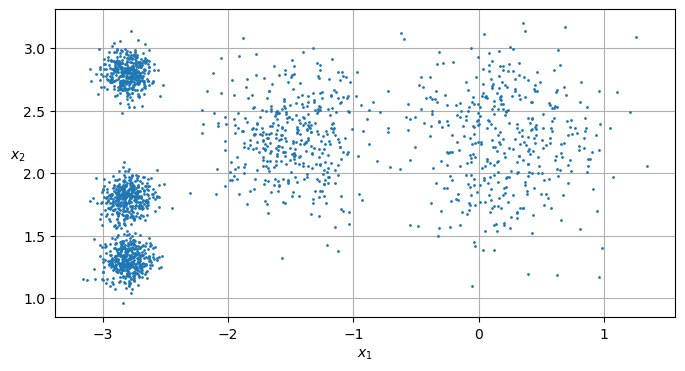

In [27]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid();

In [28]:
y_pred

array([0, 4, 1, ..., 3, 1, 4])

In [29]:
y_pred is kmeans.labels_

True

In [30]:
kmeans.labels_

array([0, 4, 1, ..., 3, 1, 4])

In [31]:
# Centroids found by the algorithm
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

In [32]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

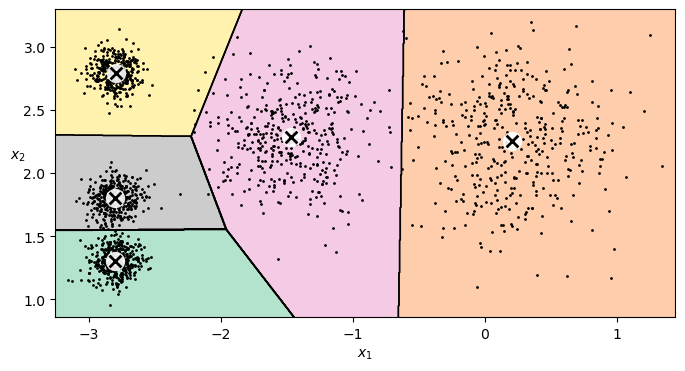

In [33]:
# k-means decision boundaries (Voronoi tessellation)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X);

In [34]:
kmeans.transform(X_new).round(2)

array([[2.89, 0.33, 1.49, 2.9 , 2.81],
       [5.84, 2.8 , 4.48, 5.85, 5.81],
       [1.71, 3.29, 1.69, 0.29, 1.21],
       [1.22, 3.22, 1.55, 0.36, 0.73]])

In [ ]:
# Page265